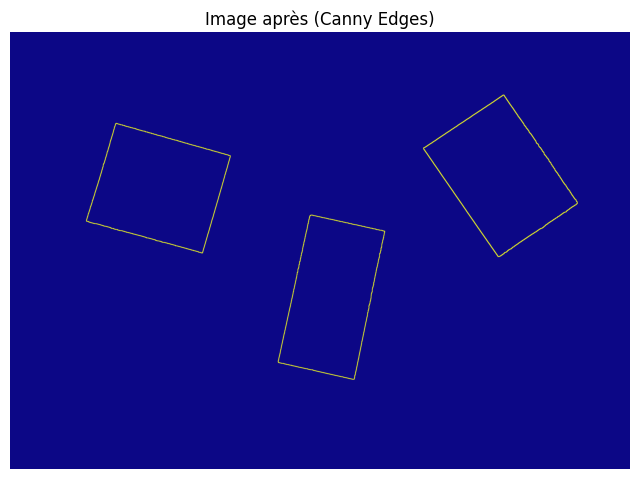

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Filtrer la couleur (bleu)
def filter_color(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower_blue = np.array([90, 50, 50])
    upper_blue = np.array([130, 255, 255])

    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    #optionnel : nettoyage du masque avec des opérations morphologiques
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, np.ones((5,5),np.uint8))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, np.ones((5,5),np.uint8))

    return mask

def preprocess_image(mask):
    """Applique un flou et une détection de contours."""
    blurred = cv2.GaussianBlur(mask, (3, 3), 0)
    edges = cv2.Canny(blurred, 50, 150, 7, L2gradient=True)
    dilated_edges = cv2.dilate(edges, kernel=np.ones((5, 5), np.uint8), iterations=1)
    return dilated_edges

# --- Utilisation ---

image_path = 'blu_obstacles.jpg' # Remplacer par le chemin de mon image
image = cv2.imread(image_path)

mask = filter_color(image)
edges = preprocess_image(mask)

plt.figure(figsize=(8, 6))
plt.imshow(edges, cmap='plasma') 
plt.title("Image après (Canny Edges)")
plt.axis('off') # Cache les axes x et y
plt.show() # Affiche la fenêtre Matplotlib


Liste des vertices :
[array([[1955,  952],
       [1621, 2437],
       [2390, 2615],
       [2704, 1115]], dtype=int32), array([[ 566,  394],
       [ 269, 1385],
       [1446, 1706],
       [1727,  719]], dtype=int32), array([[3336,  148],
       [2521,  685],
       [3276, 1786],
       [4081, 1249]], dtype=int32)]


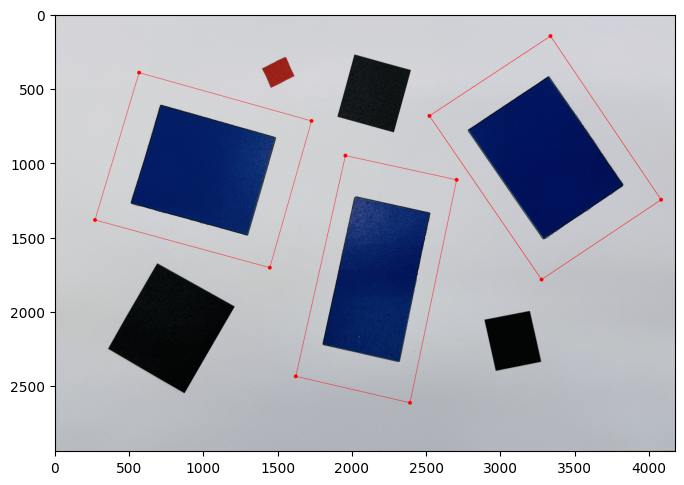

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def scale_contour(contour, scale):
    M = cv2.moments(contour)
    if M['m00'] == 0:
        return contour
    
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    center = np.array([cx, cy])
    
    scaled = (contour - center) * scale + center
    return scaled.astype(np.int32)


# --- Utilisation ---

contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

scaled_contours = []
all_vertices = []
output = image.copy()
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.02 * cv2.arcLength(cnt, True), True)
    scaled = scale_contour(approx, scale=1.5)
    scaled_contours.append(scaled)

    vertices = scaled.reshape(-1, 2)   # (4,2)
    all_vertices.append(vertices)
    for (x, y) in vertices:
        cv2.circle(output, (x, y), 13, (0, 0, 255), -1)


cv2.drawContours(output, contours, -1, (0, 0, 0), 2)
cv2.drawContours(output, scaled_contours, -1, (0, 0, 255), 2)

print("Liste des vertices :")
print(all_vertices)

plt.figure(figsize=(8,6))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis('on')
plt.show()
